In [131]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import requests
import json
import gmaps
import os
import warnings

# Importing Google maps API key
from api_keys import g_key

# Reading in the file required for analysis.
vic_subs_path = "Data files/Vic suburb price data till 2019.csv"
vic_subs_df = pd.read_csv(vic_subs_path)

In [132]:
# Displaying the data.
vic_subs_df

,Median House Price - 2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020,change,change,Growth PA
1,locality,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,2018-2019,2009-2019,NaN
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000,-14,58,4.7
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500,-7,77,5.9
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000,10,33,2.9
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000,-7,79,6
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000,9,39,3.3
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500,11,104,7.4


In [133]:
# Making the column headings equal to the first row in the dataframe since it didn't read in correctly.
vic_subs_df.columns = vic_subs_df.iloc[0]
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020,change,change,Growth PA
0,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020,change,change,Growth PA
1,locality,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,2018-2019,2009-2019,NaN
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000,-14,58,4.7
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500,-7,77,5.9
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000,10,33,2.9
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000,-7,79,6
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000,9,39,3.3
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500,11,104,7.4


In [134]:
# Removing unwanted columns
vic_subs_df = vic_subs_df.iloc[:, 0:13]
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
0,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
1,locality,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [135]:
# Removing first 2 rows.
vic_subs_df = vic_subs_df.drop(vic_subs_df.index[[0,1]])
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
5,AIREYS INLET,515000,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
6,AIRPORT WEST,456000,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [136]:
# Resetting the index numbers.
vic_subs_df = vic_subs_df.reset_index(drop=True)
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
0,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,515000,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,456000,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [137]:
# Renaming columns to be in alignment.
vic_subs_df = vic_subs_df.rename(columns={np.nan: "Suburb", "prelim 2020": "2020"})
vic_subs_df

,Suburb,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,515000,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,456000,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [138]:
# We want 10 years of data so here we remove the year 2009.
del vic_subs_df["2009"]
vic_subs_df

,Suburb,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,-,-,-,-,-,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [139]:
# The data has some missing information. In order to drop these values, we replace the - with nan values.
vic_subs_df = vic_subs_df.replace("-", np.nan)
vic_subs_df

,Suburb,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,NaN,NaN,NaN,NaN,NaN,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [140]:
# Here we drop the nan values so we have a clean df.
clean_subs_df = vic_subs_df.dropna(how='any').copy()

In [163]:
# Next we need to convert the year columns to a float otherwise they are not handled as numbers.
clean_subs_df["2010"] = clean_subs_df["2010"].astype(float)
clean_subs_df["2011"] = clean_subs_df["2011"].astype(float)
clean_subs_df["2012"] = clean_subs_df["2012"].astype(float)
clean_subs_df["2013"] = clean_subs_df["2013"].astype(float)
clean_subs_df["2014"] = clean_subs_df["2014"].astype(float)
clean_subs_df["2015"] = clean_subs_df["2015"].astype(float)
clean_subs_df["2016"] = clean_subs_df["2016"].astype(float)
clean_subs_df["2017"] = clean_subs_df["2017"].astype(float)
clean_subs_df["2018"] = clean_subs_df["2018"].astype(float)
clean_subs_df["2019"] = clean_subs_df["2019"].astype(float)
clean_subs_df["2020"] = clean_subs_df["2020"].astype(float)

In [164]:
# Next we sort from highest to lowest on the year 2020.
sorted_subs_df = clean_subs_df.sort_values("2020", ascending=False)
sorted_subs_df

,Suburb,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
715,TOORAK,2617500.0,2617500.0,2775000.0,2875000.0,3391000.0,3987500.0,4900000.0,5100000.0,4700000.0,4361000.0,4500000.0
471,MIDDLE PARK,1345000.0,1345000.0,1420500.0,1587500.0,2125000.0,2317000.0,2238500.0,2370000.0,2650000.0,2705000.0,3555000.0
100,BRIGHTON,1720000.0,1720000.0,1789500.0,1802500.0,1940000.0,2302500.0,2740000.0,3050000.0,2879000.0,2600000.0,2825000.0
321,HAWTHORN,1330000.0,1330000.0,1405000.0,1575000.0,1606500.0,1916500.0,2240000.0,2650000.0,2488000.0,2195500.0,2578000.0
583,PORTSEA,1625000.0,1625000.0,1398000.0,1195000.0,1305000.0,1800000.0,1701000.0,1925000.0,2180000.0,1950000.0,2515000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
527,NHILL,107000.0,107000.0,110000.0,110000.0,125000.0,128000.0,140000.0,126500.0,149000.0,137000.0,107500.0
476,MINYIP,82500.0,82500.0,81000.0,73500.0,95000.0,93000.0,82500.0,94000.0,81000.0,114500.0,95000.0
359,JEPARIT,101500.0,101500.0,59000.0,80500.0,63000.0,89000.0,124000.0,66500.0,77000.0,81000.0,88000.0
72,BEULAH,69000.0,69000.0,75000.0,42500.0,101000.0,65000.0,65000.0,96000.0,120500.0,77000.0,81000.0


In [165]:
# Creating a smaller df with just the columns we will be analyising in the next steps. 
condensed_subs = sorted_subs_df.loc[:, ["Suburb", "2010", "2015", "2019", "2020"]]
condensed_subs

,Suburb,2010,2015,2019,2020
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0
...,...,...,...,...,...
527,NHILL,107000.0,128000.0,137000.0,107500.0
476,MINYIP,82500.0,93000.0,114500.0,95000.0
359,JEPARIT,101500.0,89000.0,81000.0,88000.0
72,BEULAH,69000.0,65000.0,77000.0,81000.0


In [166]:
# Creating a new copy of the df to avoid copy errors.
heat_subs = condensed_subs.copy()

In [167]:
# Next we add a blank column for the latitude and longitute.
heat_subs["Lat"] = ""
heat_subs["Lng"] = ""
heat_subs

,Suburb,2010,2015,2019,2020,Lat,Lng
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,,
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,,
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,,
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,,
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,,
...,...,...,...,...,...,...,...
527,NHILL,107000.0,128000.0,137000.0,107500.0,,
476,MINYIP,82500.0,93000.0,114500.0,95000.0,,
359,JEPARIT,101500.0,89000.0,81000.0,88000.0,,
72,BEULAH,69000.0,65000.0,77000.0,81000.0,,


In [171]:
# Using a google maps API, we go through each row in the heat_subs df and fill in the latitude and longitude columns.
# The code uses the suburb name to find the lat and lng.
# If no result is returned, NaN values are inputted into the columns for that row.

heat_subs_params = {"key": g_key}

for index, row in heat_top_subs.iterrows():
    
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?"
    
    suburb = row["Suburb"]
    
    heat_subs_params["address"] = f"{suburb}, Vic"
    
    heat_subs_lat_lng = requests.get(base_url, params=heat_subs_params)
    
    heat_subs_lat_lng = heat_subs_lat_lng.json()
    
    try:
        heat_subs.loc[index, "Lat"] = heat_subs_lat_lng["results"][0]["geometry"]["location"]["lat"]
        heat_subs.loc[index, "Lng"] = heat_subs_lat_lng["results"][0]["geometry"]["location"]["lng"]
    
    except:
        heat_subs.loc[index, "Lat"] = np.nan
        heat_subs.loc[index, "Lng"] = np.nan

In [173]:
# Getting rid of any lines with incomplete data
heat_subs = heat_subs.dropna(how='any')

In [174]:
# Displaying the df to check results.
heat_subs

,Suburb,2010,2015,2019,2020,Lat,Lng
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,-37.8417,145.014
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,-37.8519,144.963
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,-37.9043,144.993
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,-37.8226,145.035
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,-38.32,144.713
...,...,...,...,...,...,...,...
527,NHILL,107000.0,128000.0,137000.0,107500.0,-36.3328,141.65
476,MINYIP,82500.0,93000.0,114500.0,95000.0,-36.4577,142.594
359,JEPARIT,101500.0,89000.0,81000.0,88000.0,-36.1331,141.944
72,BEULAH,69000.0,65000.0,77000.0,81000.0,-35.9381,142.42


In [175]:
# Now we want to identify the 5 highest priced suburbs and the 5 lowest priced suburbs.
# Top 5 - using head().
top_subs = heat_subs.head(5).copy()
top_subs 

,Suburb,2010,2015,2019,2020,Lat,Lng
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,-37.8417,145.014
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,-37.8519,144.963
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,-37.9043,144.993
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,-37.8226,145.035
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,-38.32,144.713


In [176]:
# Bottom 5 subs using tail().
bottom_subs = heat_subs.tail(5).copy()
bottom_subs 

,Suburb,2010,2015,2019,2020,Lat,Lng
527,NHILL,107000.0,128000.0,137000.0,107500.0,-36.3328,141.65
476,MINYIP,82500.0,93000.0,114500.0,95000.0,-36.4577,142.594
359,JEPARIT,101500.0,89000.0,81000.0,88000.0,-36.1331,141.944
72,BEULAH,69000.0,65000.0,77000.0,81000.0,-35.9381,142.42
590,RAINBOW,71500.0,68000.0,75000.0,77500.0,-35.9008,141.997


In [177]:
# A google heat map is going to be generate with markers for the top and bottom priced suburbs.
# Here we are setting the markers and configuring google maps.
top_markers = top_subs[["Lat", "Lng"]]
low_markers = bottom_subs[["Lat", "Lng"]]
gmaps.configure(api_key=g_key)

In [200]:
# Generating the heatmap based on suburb latitude and longitude.
locations = heat_subs[["Lat", "Lng"]

# Converting the price into a readable format for the heatmap.
price = heat_subs["2020"]/100000

# Generating the figure                      
fig = gmaps.figure(zoom_level=8, center=(-38, 145))

# Adding the markers
top_price_layer = gmaps.symbol_layer(top_markers, fill_color='green', stroke_color='blue', scale=3)
low_price_layer = gmaps.symbol_layer(low_markers, fill_color='purple', stroke_color='purple', scale=3)

# Defining the heatlayer.                      
heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=False, max_intensity=10, point_radius=0.05)

# Adding the heat layer and the marker layers to the map.                                         
fig.add_layer(heat_layer)
fig.add_layer(top_price_layer)
fig.add_layer(low_price_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [179]:
# Next we wanted to compare the 2020 heatmap to 2015 to identify areas of growth.
locations = heat_subs[["Lat", "Lng"]]

price = heat_subs["2015"]/100000

fig = gmaps.figure(zoom_level=8, center=(-38, 145))

heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=False, max_intensity=10, point_radius=0.05)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [180]:
# We also included a 2010 heatmap for comparison purposes.
locations = heat_subs[["Lat", "Lng"]]

price = heat_subs["2010"]/100000

fig = gmaps.figure(zoom_level=8, center=(-38, 145))

heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=False, max_intensity=10, point_radius=0.05)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [182]:
# In this section we completed some statistical analysis for the years 2010, 2015 and 2020.
# The IQR was calculated along and any outliers were identified.
# The results were then printed and a new df was created to show a summary of the results. 

years = ["2010", "2015", "2020"]

price_list = []
data_frame = []

for year in years:
    price_data = (heat_subs[year] / 1000)
    quartiles = price_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq, 2)
    
    price_list.append(price_data)
    
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    outlier = heat_subs.loc[((heat_subs[year]/1000) < lower_bound) | ((heat_subs[year]/1000) > upper_bound)]
    
    outlier_value = outlier[year].tolist()
    outlier_count = len(outlier_value)
       
    print(f"{year} Summary:")
    print(f"The lower quartile of {year} is: {lowerq}")
    print(f"The upper quartile of {year} is: {upperq}")
    print(f"The interquartile range of {year} is: {iqr}")
    print(f"The median of {year} is: {quartiles[0.5]} ")
    print(f"The year {year} has {outlier_count} outliers.")
    
    print("--------------------------------------------------")
    
    data_frame.append({"Year": year, "Lower Qrt": lowerq, "Upper Qrt": upperq, "IQR": iqr, "Median": quartiles[0.5],
                       "No. of Outliers": outlier_count})
    
    stats_df = pd.DataFrame(data_frame)                    

2010 Summary:
The lower quartile of 2010 is: 267.5
The upper quartile of 2010 is: 569.0
The interquartile range of 2010 is: 301.5
The median of 2010 is: 380.0 
The year 2010 has 35 outliers.
--------------------------------------------------
2015 Summary:
The lower quartile of 2015 is: 293.5
The upper quartile of 2015 is: 700.0
The interquartile range of 2015 is: 406.5
The median of 2015 is: 423.5 
The year 2015 has 43 outliers.
--------------------------------------------------
2020 Summary:
The lower quartile of 2020 is: 405.0
The upper quartile of 2020 is: 925.0
The interquartile range of 2020 is: 520.0
The median of 2020 is: 600.5 
The year 2020 has 37 outliers.
--------------------------------------------------


In [183]:
# Displaying the df.
stats_df

,Year,Lower Qrt,Upper Qrt,IQR,Median,No. of Outliers
0,2010,267.5,569.0,301.5,380.0,35
1,2015,293.5,700.0,406.5,423.5,43
2,2020,405.0,925.0,520.0,600.5,37


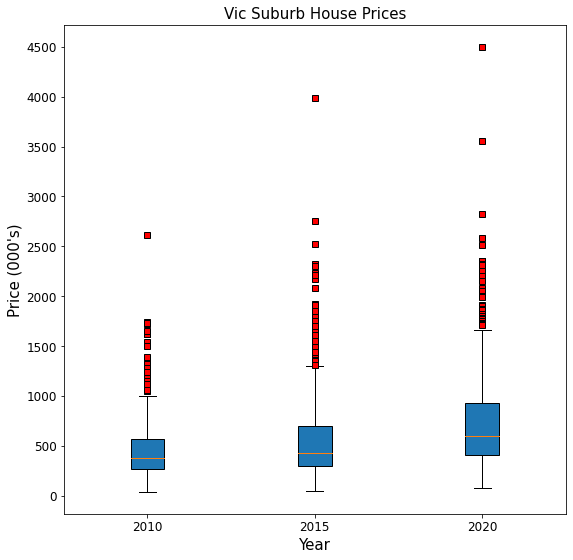

In [202]:
# Based on the data calculated above, a boxplot was created to get a visualisation of the results. 

# Setting the graph parameters.
plt.rcParams.update({'font.size': 12})
fig1, ax1 = plt.subplots(figsize=(9, 9))
ax1.set_title("Vic Suburb House Prices", fontsize = 15)
ax1.set_ylabel("Price (000's)", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.yticks(np.arange(0, 5000, step=500))

# Formatting is applied to outliers in the data. 
red_square = dict(markerfacecolor='r', marker='s')

# Generating the graph using the price list from the previous For Loop and the year list for the labels.
ax1.boxplot(price_list, labels=(years), widths = 0.2, flierprops=red_square, patch_artist=True);

# Saving a copy of the graph.
plt.savefig("Images/Vic Suburb Boxplot.png", bbox_inches='tight');

# Display the boxplot.
plt.show()

In [203]:
# Here we are going back to the dataframe that had all the years data.
subs_df = clean_subs_df.copy()
subs_df

,Suburb,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,730000.0,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0
1,ABERFELDIE,994000.0,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0
3,AIREYS INLET,680000.0,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0
4,AIRPORT WEST,557500.0,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0
5,ALBANVALE,317000.0,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0
799,YARRAVILLE,607000.0,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0
800,YARRAWONGA,270000.0,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0
801,YEA,270000.0,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0


In [186]:
# The next part of the analysis requires the postcode to be added to our dataframe.
# Here we add a blank column for postcode.
subs_df["Postcode"] = ""
subs_df

,Suburb,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Postcode
0,ABBOTSFORD,730000.0,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0,
1,ABERFELDIE,994000.0,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0,
3,AIREYS INLET,680000.0,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0,
4,AIRPORT WEST,557500.0,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0,
5,ALBANVALE,317000.0,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,
799,YARRAVILLE,607000.0,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0,
800,YARRAWONGA,270000.0,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0,
801,YEA,270000.0,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0,


In [187]:
# Now we use the google maps API to iterate through each row and add the suburbs postcode to the dataframe.
# If no postcode can be found, NaN values are entered into the row.

new_params = {"key": g_key}

for index, row in subs_df.iterrows():
    
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?"
    
    suburb = row["Suburb"]
    
    new_params["address"] = f"{suburb}, Vic"
    
    subs_postcode = requests.get(base_url, params=new_params)
    
    subs_postcode = subs_postcode.json()
    
    try:
        subs_df.loc[index, "Postcode"] = subs_postcode["results"][0]["address_components"][4]["long_name"]
    
    except:
        subs_df.loc[index, "Postcode"] = np.nan

In [188]:
# Displaying the df.
subs_df

,Suburb,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Postcode
0,ABBOTSFORD,730000.0,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0,3067
1,ABERFELDIE,994000.0,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0,3040
3,AIREYS INLET,680000.0,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0,3231
4,AIRPORT WEST,557500.0,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0,3042
5,ALBANVALE,317000.0,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0,3021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,3971
799,YARRAVILLE,607000.0,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0,3013
800,YARRAWONGA,270000.0,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0,3730
801,YEA,270000.0,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0,3717


In [189]:
# Dropping any rows that couldn't return a postcode match.
all_post_df = subs_df.dropna().copy()
all_post_df

,Suburb,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Postcode
0,ABBOTSFORD,730000.0,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0,3067
1,ABERFELDIE,994000.0,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0,3040
3,AIREYS INLET,680000.0,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0,3231
4,AIRPORT WEST,557500.0,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0,3042
5,ALBANVALE,317000.0,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0,3021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,3971
799,YARRAVILLE,607000.0,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0,3013
800,YARRAWONGA,270000.0,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0,3730
801,YEA,270000.0,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0,3717


In [190]:
# Saving the new dataframe to a csv file.
# We have an income csv file that shows income via postcode. 
# We will merge the income csv and this new csv file. This happens in a different file to keep it clean (refer to 'salary analysis.ipynb').
all_post_df.to_csv("Data files/prices with postcode.csv", encoding="utf-8", index=False, header=True)

In [191]:
# To avoid using the google maps API again to get the Lat and Lng for each suburb, 
# I used the data gathered earlier and saved it to csv. 
# This will be merged with the "prices with postcode file" & income file.
subs_loc = heat_subs[["Suburb", "Lat", "Lng"]]

In [192]:
# Saving the file.
subs_loc.to_csv("Data files/subs lat and lng.csv", encoding="utf-8", index=False, header=True)